In [ ]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
#from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


170498071/170498071 [==============================] - 6s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical

# Let's now recreate the modified model architecture
modified_model = Sequential()

# Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
modified_model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
# Dropout layer at 20%.
modified_model.add(Dropout(0.2))
# Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
modified_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Max Pool layer with size 2×2.
modified_model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
modified_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Dropout layer at 20%.
modified_model.add(Dropout(0.2))
# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
modified_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Max Pool layer with size 2×2.
modified_model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
modified_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Dropout layer at 20%.
modified_model.add(Dropout(0.2))
# Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
modified_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Max Pool layer with size 2×2.
modified_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer.
modified_model.add(Flatten())
# Dropout layer at 20%.
modified_model.add(Dropout(0.2))
# Fully connected layer with 1024 units and a rectifier activation function.
modified_model.add(Dense(1024, activation='relu'))
# Dropout layer at 20%.
modified_model.add(Dropout(0.2))
# Fully connected layer with 512 units and a rectifier activation function.
modified_model.add(Dense(512, activation='relu'))
# Dropout layer at 20%.
modified_model.add(Dropout(0.2))
# Fully connected output layer with 10 units and a Softmax activation function.
modified_model.add(Dense(num_classes, activation='softmax'))

# Compile the modified model
modified_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
modified_model_summary = modified_model.summary()
modified_model_summary

# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate)
modified_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(modified_model.summary())
# Fit the model
history = modified_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = modified_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_50 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_51 (Dropout)        (None, 16, 16, 64)        0         
                                                      

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_50 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_51 (Dropout)        (None, 16, 16, 64)        0         
                                                      

In [ ]:
predictions = modified_model.predict(X_test[:4])
predicted_classes = predictions.argmax(axis=1)
actual_classes = y_test[:4].argmax(axis=1)



1/1 [==============================] - 0s 105ms/step


In [ ]:
for i in range(4):
    print(f"Image {i+1} - Predicted Class: {predicted_classes[i]}, Actual Class: {actual_classes[i]}")


Image 1 - Predicted Class: 3, Actual Class: 3
Image 2 - Predicted Class: 8, Actual Class: 8
Image 3 - Predicted Class: 8, Actual Class: 8
Image 4 - Predicted Class: 8, Actual Class: 0


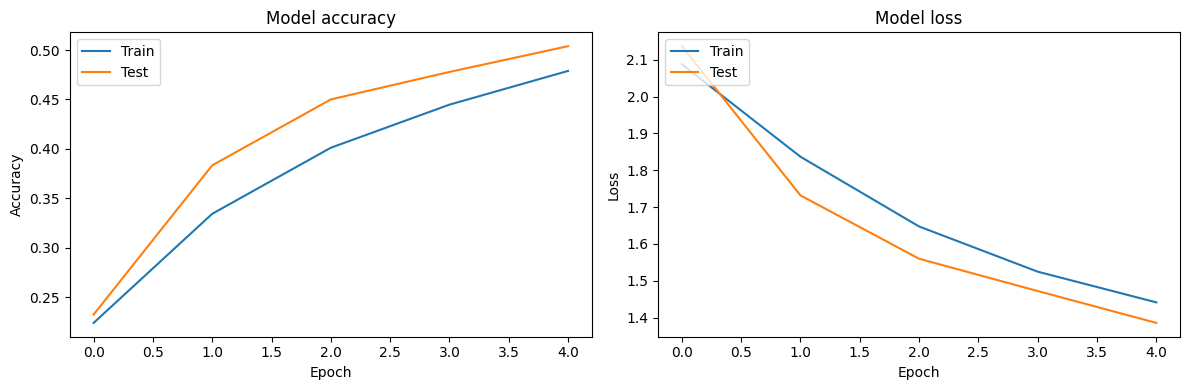

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
